In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from keras.datasets import fashion_mnist

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import itertools

%matplotlib inline
%reload_ext nb_black

Using TensorFlow backend.


<IPython.core.display.Javascript object>

In [2]:
tf.__version__

'2.1.0'

<IPython.core.display.Javascript object>

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

<IPython.core.display.Javascript object>

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

<IPython.core.display.Javascript object>

In [5]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]


def to_label(index: int) -> str:

    return class_names[index]

<IPython.core.display.Javascript object>

In [6]:
class MyEarlyStopping(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print("\n$$Logs:", logs)
        if logs.get("val_accuracy") > 0.88:
            print("Reached 88% accuracy. Stopping training!")
            self.model.stop_training = True

<IPython.core.display.Javascript object>

In [7]:
def create_model()->keras.models.Model():
    
    model = keras.Sequential()
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=512, activation='relu'))
    model.add(keras.layers.Dense(units=256, activation='relu'))
    model.add(keras.layers.Dense(units=len(class_names), activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model


<IPython.core.display.Javascript object>

In [8]:
model = create_model()

<IPython.core.display.Javascript object>

In [9]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_accuracy", min_delta=0.01, patience=4, verbose=2
)

my_early_stopping = MyEarlyStopping()

<IPython.core.display.Javascript object>

In [10]:
model.fit(x_train, y_train, epochs=50, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/50
54000/54000 [==============================] - 4s 67us/sample - loss: 0.4779 - accuracy: 0.8272 - val_loss: 0.3720 - val_accuracy: 0.8660
Epoch 2/50
54000/54000 [==============================] - 3s 64us/sample - loss: 0.3602 - accuracy: 0.8665 - val_loss: 0.3939 - val_accuracy: 0.8502
Epoch 3/50
54000/54000 [==============================] - 3s 62us/sample - loss: 0.3270 - accuracy: 0.8786 - val_loss: 0.3286 - val_accuracy: 0.8795
Epoch 4/50
54000/54000 [==============================] - 4s 66us/sample - loss: 0.2995 - accuracy: 0.8889 - val_loss: 0.3296 - val_accuracy: 0.8773
Epoch 5/50
54000/54000 [==============================] - 4s 68us/sample - loss: 0.2822 - accuracy: 0.8951 - val_loss: 0.3371 - val_accuracy: 0.8835
Epoch 6/50
54000/54000 [==============================] - 4s 66us/sample - loss: 0.2681 - accuracy: 0.8987 - val_loss: 0.3289 - val_accuracy: 0.8832
Epoch 7/50
54000/54000 [==============================] -

<IPython.core.display.Javascript object>

In [11]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 84us/sample - loss: 0.7439 - accuracy: 0.8915


[0.7438657441750168, 0.8915]

<IPython.core.display.Javascript object>

In [12]:
test_index = 0

<IPython.core.display.Javascript object>

In [13]:
prediction = model.predict(
    x_test[test_index].reshape(
        1, x_test[test_index].shape[0], x_test[test_index].shape[1]
    )
)

prediction = np.argmax(prediction)

to_label(prediction)

'Ankle boot'

<IPython.core.display.Javascript object>

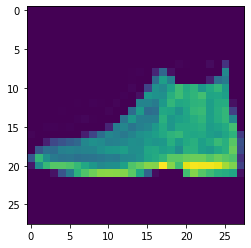

<IPython.core.display.Javascript object>

In [14]:
plt.imshow(x_test[test_index])
plt.show()

In [15]:
model.predict_classes(
    x_test[test_index].reshape(
        1, x_test[test_index].shape[0], x_test[test_index].shape[1]
    )
)[0]

9

<IPython.core.display.Javascript object>

In [16]:
y_pred = model.predict_classes(x_test)

<IPython.core.display.Javascript object>

In [17]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.78      0.84      0.81      1000
       Dress       0.89      0.90      0.89      1000
        Coat       0.82      0.79      0.81      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.74      0.68      0.71      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



<IPython.core.display.Javascript object>

In [18]:
matrix = confusion_matrix(y_test, y_pred)

<IPython.core.display.Javascript object>

In [19]:
def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues
):

    plt.figure(figsize=(20, 10))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

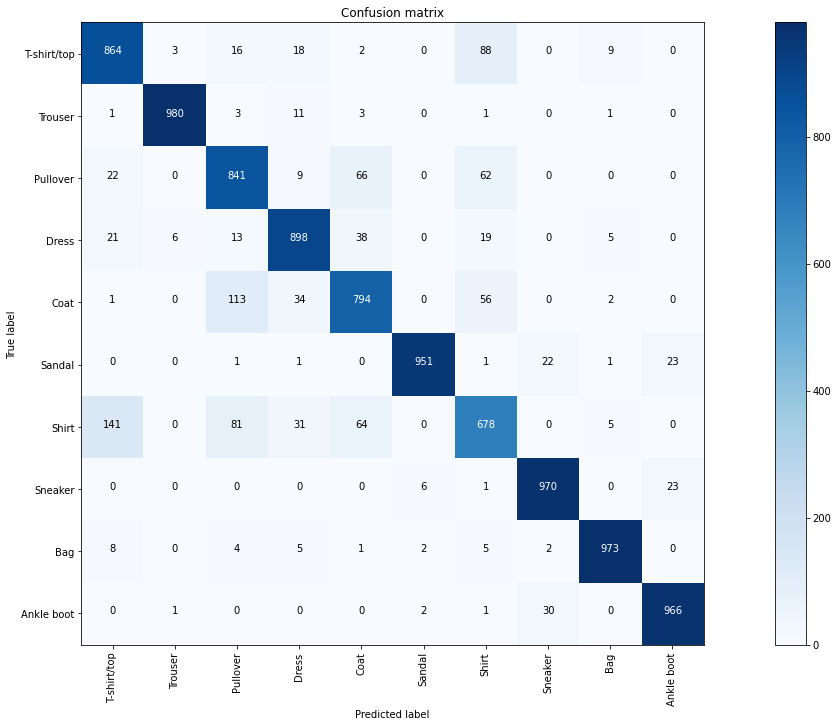

<IPython.core.display.Javascript object>

In [20]:
plot_confusion_matrix(matrix, class_names)